In [1]:
 from google.colab import drive
 drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# download yolo
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -qr yolov5/requirements.txt # install dependencies (ignore errors)

Cloning into 'yolov5'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 2812 (delta 15), reused 10 (delta 0), pack-reused 2774
Receiving objects: 100% (2812/2812), 6.55 MiB | 32.87 MiB/s, done.
Resolving deltas: 100% (1855/1855), done.
     |████████████████████████████████| 276kB 9.1MB/s 


In [7]:
## TO PREDICT A SINGLE IMAGE FILE ##
imgPath = '/content/drive/My Drive/YOLO/costum Yolo/signs detection/yolo to traffiSignRec/yolo2rec.jpg'
output = !python /content/yolov5/detect.py --source '/content/drive/My Drive/YOLO/costum Yolo/signs detection/yolo to traffiSignRec/yolo2rec.jpg' --weights '/content/drive/My Drive/YOLO/costum Yolo/signs detection/yolo to traffiSignRec/best.pt' --save-txt
  
print(output)

["Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', img_size=640, iou_thres=0.45, name='', save_conf=False, save_dir='runs/detect', save_txt=True, source='/content/drive/My Drive/YOLO/costum Yolo/signs detection/yolo to traffiSignRec/yolo2rec.jpg', update=False, view_img=False, weights=['/content/drive/My Drive/YOLO/costum Yolo/signs detection/yolo to traffiSignRec/best.pt'])", 'Using torch 1.7.0+cu101 CUDA:0 (Tesla T4, 15079MB)', '', 'Fusing layers... ', 'Model Summary: 140 layers, 7.24652e+06 parameters, 0 gradients', 'image 1/1 /content/drive/My Drive/YOLO/costum Yolo/signs detection/yolo to traffiSignRec/yolo2rec.jpg: 480x640 4 Traffic signs, Done. (0.014s)', 'Results saved to runs/detect/exp0', 'Done. (0.438s)']


In [8]:
def findTopLeftPoint(x_center, y_center, width, height, imageShape):
    x_center = x_center
    y_center = y_center
    width = width
    height = height
    #turn to real values and not normalized
    x_center = x_center * imageShape[1]
    y_center = y_center * imageShape[0]
    width = width * imageShape[1]
    height = height * imageShape[0]

    topX = x_center - (width/2)
    topY = y_center - (height/2)
    return topX, topY, width, height

In [9]:
# create directory to save images
dir = "myImages"
!mkdir $dir

mkdir: cannot create directory ‘myImages’: File exists


“File saved successfully”
“File saved successfully”
“File saved successfully”
“File saved successfully”


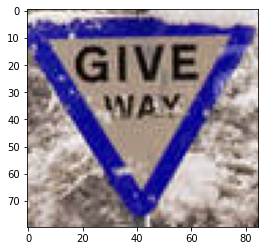

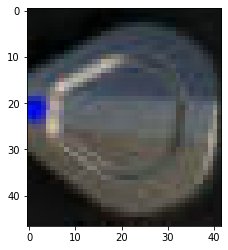

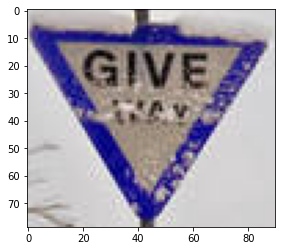

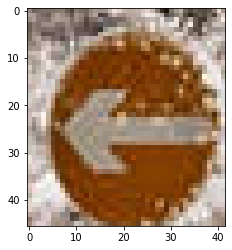

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# open the txt predicted file only to read
f = open("/content/runs/detect/exp0/labels/yolo2rec.txt", "r")
fileslines = f.read().splitlines()
i=0 # for images names
for line in fileslines:
    # read the image
    img = cv2.imread(imgPath)
    # convert to numpy array
    img = np.array(img)
    # take infos and convert to floats
    info = line.rsplit(" ")
    x_center = float(info[1])
    y_center = float(info[2])
    width = float(info[3])
    height = float(info[4])
    #convert to real numbers
    x_center = x_center * img.shape[1]
    y_center = y_center * img.shape[0]
    width = width * img.shape[1]
    height = height * img.shape[0]
    
    # turn to integers
    x_center = int(x_center)
    y_center = int(y_center)
    width = int(width)
    height = int(height)
    
    # find the topX and topY
    topX = int(x_center - width/2)
    topY = int(y_center - height/2)
    

    #slice my image
    slicedImg = img[topY:topY + height, topX:topX + width]
    # Show images
    plt.figure() 
    plt.imshow(slicedImg)
    # save images
    result=cv2.imwrite(f"/content/myImages/{i}.jpg", slicedImg)
    if result==True:
        print("“File saved successfully”")
    else:
        print("“Error in saving file”")
    i+=1

In [11]:
# Load my model
from keras.models import load_model
new_model = load_model("/content/drive/My Drive/murtaza projects/taffic sign/traffic_sign_recognition.h5")
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 4, 4, 30)         

In [12]:
# Preprocessing images

def blurImage(img):
    blur = cv2.GaussianBlur(img, (5, 5), 0)
    return img

def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return img

def equalize(img):
    img = cv2.equalizeHist(img)
    return img


def preprocessing(img):
    img = blurImage(img) # No noise
    img = grayscale(img) # Convert to grayscale
    img = equalize(img)  # Standarize the lighting
    img = img/255        # Normalize values between 0-1
    return img

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

myPath = f"/content/{dir}"
for file in os.listdir(myPath):
    imgOrignal = cv2.imread(f"{myPath}")
    img = np.asarray(imgOrignal)
    img = cv2.resize(img, (32, 32))
    img = preprocessing(img)
    img = img.reshape(1, 32, 32, 1)
    cv2.putText(imgOrignal, "CLASS: " , (20, 35), font, 0.75, (255, 0, 0), 2, cv2.LINE_AA)
    cv2.putText(imgOrignal, "PROBABILITY: ", (20, 75), font, 0.75, (255, 0, 0), 2, cv2.LINE_AA)
    # PREDICT IMAGE
    predictions = new_model.predict(img)
    classIndex = new_model.predict_classes(img)
    probabilityValue =np.amax(predictions)
    if probabilityValue > threshold:
        print(getCalssName(classIndex))
        cv2.putText(imgOrignal,str(classIndex)+" "+str(getCalssName(classIndex)), (120, 35), font, 0.75, (255, 0, 0), 2, cv2.LINE_AA)
        cv2.putText(imgOrignal, str(round(probabilityValue*100,2) )+"%", (180, 75), font, 0.75, (255, 0, 0), 2, cv2.LINE_AA)
        plt.imshow(imgOrignal)

In [13]:
# Read CSV File
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/traffic sign recognition/dataset/labels.csv")
print("data shape ",data.shape,type(data))
print(data)

data shape  (43, 2) <class 'pandas.core.frame.DataFrame'>
    ClassId                                               Name
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yie

In [14]:
def getCalssName(classNo):
    return data.Name[classNo]

In [30]:
threshold = 0.75         # PROBABLITY THRESHOLD
font = cv2.FONT_HERSHEY_SIMPLEX

imgOrignal = cv2.imread('/content/myImages/3.jpg')
img = np.asarray(imgOrignal)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
img = img.reshape(1, 32, 32, 1)
cv2.putText(imgOrignal, "CLASS: " , (20, 35), font, 0.75, (255, 0, 0), 2, cv2.LINE_AA)
cv2.putText(imgOrignal, "PROBABILITY: ", (20, 75), font, 0.75, (255, 0, 0), 2, cv2.LINE_AA)
# PREDICT IMAGE
predictions = new_model.predict(img)
classIndex = new_model.predict_classes(img)
probabilityValue =np.amax(predictions)
if probabilityValue > threshold:
    print(getCalssName(classIndex))
    cv2.putText(imgOrignal,str(classIndex)+" "+str(getCalssName(classIndex)), (120, 35), font, 0.75, (255, 0, 0), 2, cv2.LINE_AA)
    cv2.putText(imgOrignal, str(round(probabilityValue*100,2) )+"%", (180, 75), font, 0.75, (255, 0, 0), 2, cv2.LINE_AA)
    plt.imshow(imgOrignal)